# Fierce Research US Non-Farm Payrolls Analysis

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-dark-palette')

import PyDSWS as PyDSWS
ds = PyDSWS.Datastream(username='x', password='x')

df = ds.get_data(tickers='S&PCOMP(RI),USEMPNGME(REL1),US&NFARMO',
                  start="2009-01-01",end="-1", freq="M")

df.columns= ['s&p_500','nfp_actual','nfp_polls']

df

,s&p_500,nfp_actual,nfp_polls
Date,,,
2008-12-31,1452.98,-598.0,-525
2009-01-31,1329.81,-651.0,-648
2009-02-28,1133.43,-663.0,-650
2009-03-31,1314.63,-539.0,-620
2009-04-30,1424.41,-345.0,-520
...,...,...,...
2020-04-30,5778.53,2509.0,-8000
2020-05-31,6251.48,4800.0,3000
2020-06-30,6383.76,1763.0,1600


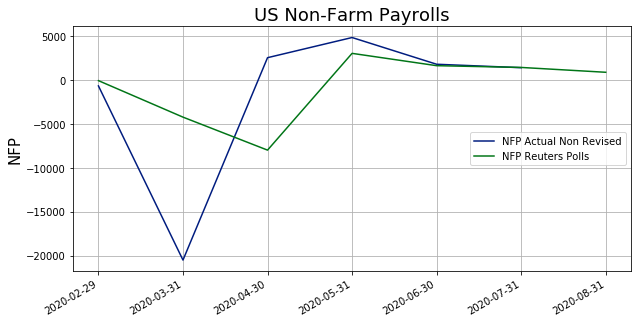

In [60]:
fig = plt.figure(figsize=(10,5))
plt.plot(df.index[-7:],df['nfp_actual'][-7:],label='NFP Actual Non Revised')
plt.plot(df.index[-7:],df['nfp_polls'][-7:],label='NFP Reuters Polls')
plt.ylabel('NFP',size=15)
plt.legend(loc=7)
plt.title('US Non-Farm Payrolls',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
fig.autofmt_xdate()
plt.show()

In [61]:
df.isnull().sum()

s&p_500       0
nfp_actual    1
nfp_polls     0
dtype: int64

In [62]:
df.dtypes

s&p_500       float64
nfp_actual    float64
nfp_polls       int64
dtype: object

In [63]:
df['nfp_actual'] = df['nfp_actual'].shift(1)
df['nfp_polls'] = df['nfp_polls'].shift(1)
df['spreturn']= (((df['s&p_500'].shift(-1)-df['s&p_500'])/df['s&p_500'])*100).round(2)
df['nfp_spread'] = df['nfp_actual']-df['nfp_polls']

In [64]:
df.tail()

,s&p_500,nfp_actual,nfp_polls,spreturn,nfp_spread
Date,,,,,
2020-04-30,5778.53,-20500.0,-4250.0,8.18,-16250.0
2020-05-31,6251.48,2509.0,-8000.0,2.12,10509.0
2020-06-30,6383.76,4800.0,3000.0,5.87,1800.0
2020-07-31,6758.20,1763.0,1600.0,7.22,163.0
2020-08-31,7246.37,1371.0,1400.0,NaN,-29.0


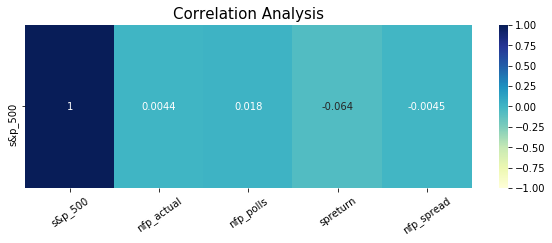

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
sns.heatmap(df.corr()[:1],vmin=-1,vmax=1,annot=True,cmap="YlGnBu")
plt.xticks(rotation=35)
ax.set_title('Correlation Analysis', size=15);

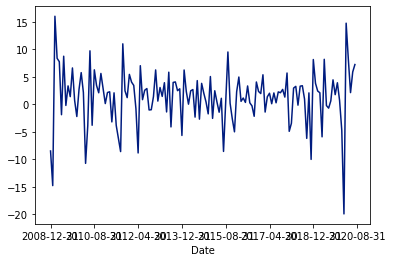

In [66]:
df['spreturn'].plot();

In [67]:
df['posneg'] = [1 if row['nfp_spread']>0 else 0 for idx,row in df.iterrows()]
df.tail(2)

,s&p_500,nfp_actual,nfp_polls,spreturn,nfp_spread,posneg
Date,,,,,,
2020-07-31,6758.20,1763.0,1600.0,7.22,163.0,1
2020-08-31,7246.37,1371.0,1400.0,NaN,-29.0,0


In [68]:
df.groupby(['posneg']).mean().round(2)

,s&p_500,nfp_actual,nfp_polls,spreturn,nfp_spread
posneg,,,,,
0,3484.88,-218.08,68.39,1.42,-286.48
1,3785.73,301.62,69.91,1.13,231.71


In [69]:
df.groupby(['posneg']).std().round(2)

,s&p_500,nfp_actual,nfp_polls,spreturn,nfp_spread
posneg,,,,,
0,1511.50,2455.76,575.46,5.32,1923.09
1,1527.87,661.95,1070.43,4.57,1273.50


Good luck with the market!

Guillaume Girard, CMT 

Fierce Research